In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9035714285714285
P-value: 3.880504128799775e-06


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.4130843658911876e-05


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9035714285714285
P-value: 3.880504128799775e-06


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.413697147071471e-05


In [9]:
weights_unenc_sklearn

array([ 0.02273508,  0.03299428, -0.01382651, -0.00750232,  0.0182653 ,
       -0.00669624,  0.04206776,  0.00586934, -0.0124723 , -0.01893391,
        0.02230738, -0.01726828, -0.0151184 , -0.00400013,  0.02435075])

In [10]:
weights_unenc_paillier

[0.025027670695730433,
 0.025765690595274723,
 -0.0009581660000012882,
 -0.015032359505481596,
 0.01516515810462833,
 -0.007579859799617326,
 0.041699287099725785,
 0.007099901547038639,
 -0.013383811858677796,
 -0.013410425593567891,
 0.02692323793742332,
 -0.007704326617108595,
 -0.01841472731500301,
 -0.00024693497418870944,
 0.03150207053532814]

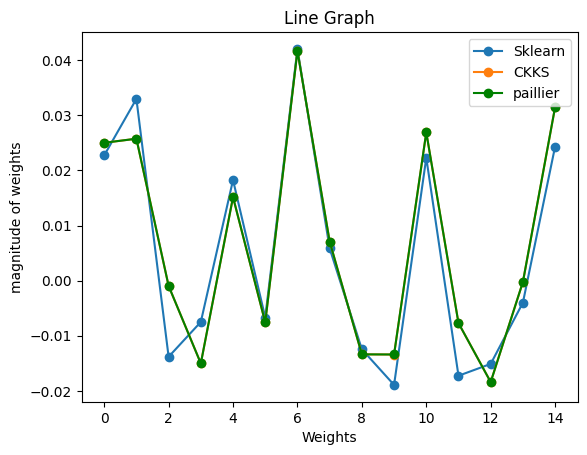

In [11]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

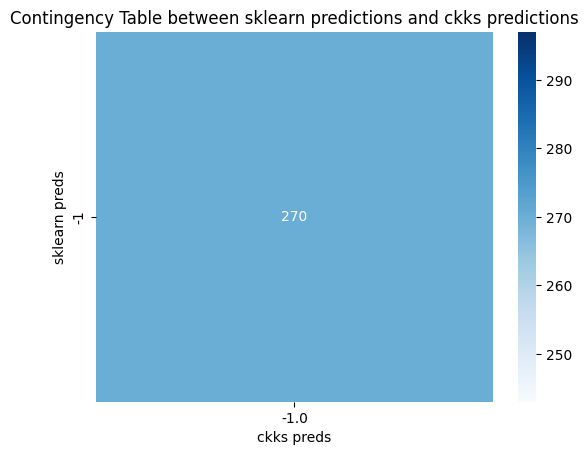

In [12]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

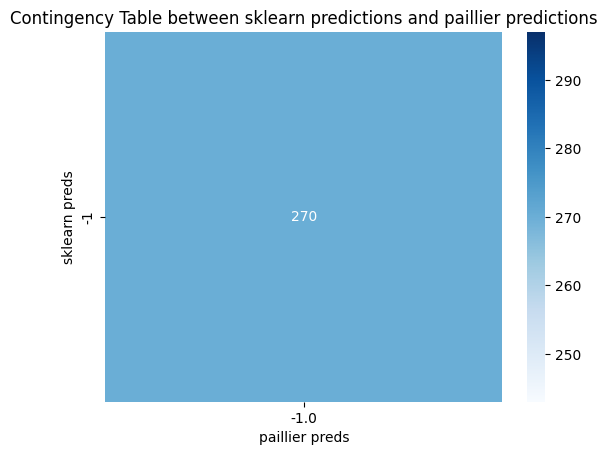

In [13]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

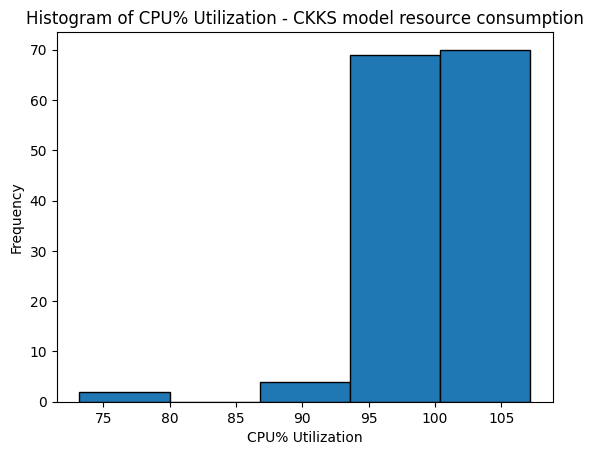

In [14]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [15]:
np.median(filtered_ckks_cpu_util)

100.1

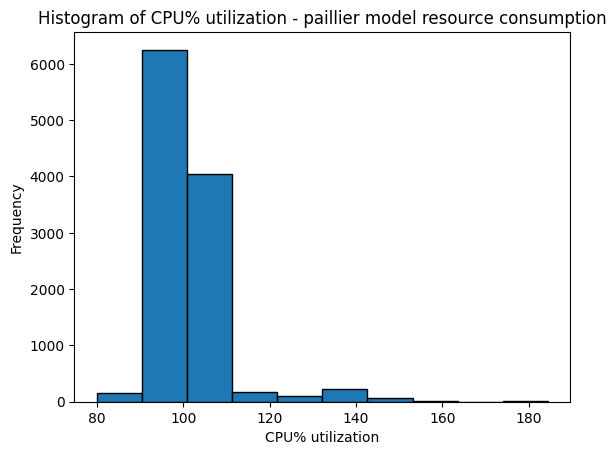

In [16]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [17]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

101.60836960464273
100.1


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

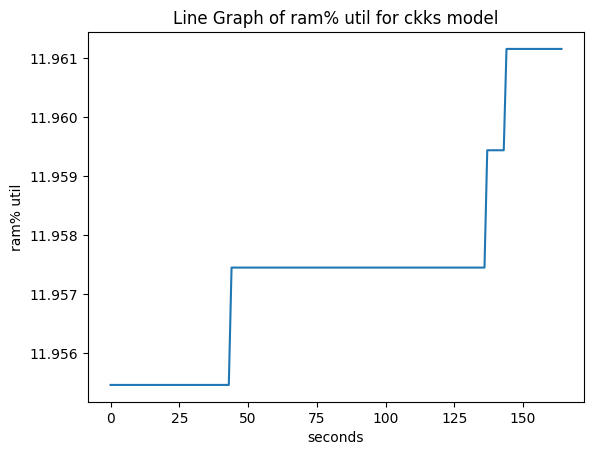

In [18]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [19]:
print(np.mean(ram_usages_ckks))
print(np.median(ram_usages_ckks))

11.957474896894603
11.957449177831316


Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

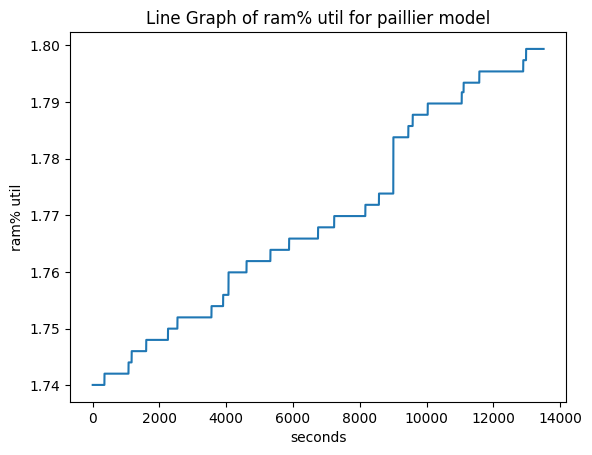

In [20]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [21]:
print(np.mean(ram_usages_paillier))
print(np.median(ram_usages_paillier))

1.769492282630252
1.7678846330375322


In [22]:
np.mean(ram_usages_sklearn)

1.5953699119518816

In [23]:
train_time_ckks

160.42527842521667

In [24]:
train_time_paillier

14098.440980672836

In [25]:
testing_time_ckks

7.169522285461426

In [26]:
testing_time_paillier

616.0156774520874

In [27]:
print(f"accuracy sklearn model: {accuracy_sklearn}")
print(f"accuracy ckks model: {accuracy_ckks}")
print(f"accuracy paillier model: {accuracy_paillier}")

accuracy sklearn model: 0.8481481481481481
accuracy ckks model: 0.8481481481481481
accuracy paillier model: 0.8481481481481481


In [28]:
print(f"sklearn training time: {train_time_sklearn}")
print(f"sklearn testing time: {testing_time_sklearn}")
print(f"sklearn cpu usage: {cpu_usages_sklearn}")
print(f"sklearn ram usage: {ram_usages_sklearn}")

sklearn training time: 0.009964942932128906
sklearn testing time: 0.00041174888610839844
sklearn cpu usage: [2.0, 1.0, 1.0]
sklearn ram usage: [1.5953699119518814, 1.5953699119518814, 1.5953699119518814]
